# Stock price predictor

In [1]:
#pip install yfinance

In [2]:
import numpy as np
import pandas as pd 
import yfinance as yf 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
stocks = input('Enter the code of the stock:- ')
data = yf.download(stocks, '2008-01-01', '2021-01-18')
data.head()

Enter the code of the stock:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.572,7.876,7.564,7.850,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,7.967,53775


In [4]:
data.shape

(3282, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3282 non-null   float64
 1   High       3282 non-null   float64
 2   Low        3282 non-null   float64
 3   Close      3282 non-null   float64
 4   Adj Close  3282 non-null   float64
 5   Volume     3282 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.5 KB


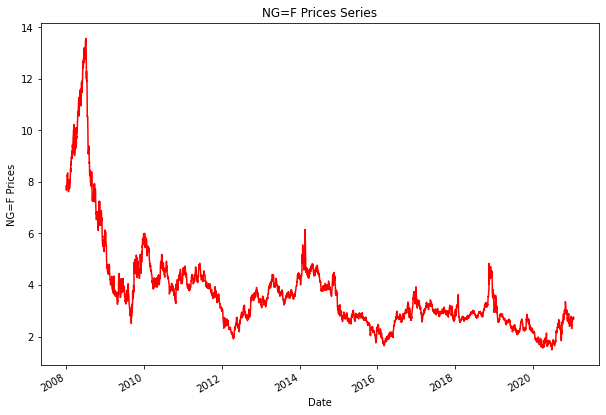

In [6]:
data.Close.plot(figsize=(10,7), color='r')
plt.ylabel('{} Prices'.format(stocks))
plt.title('{} Prices Series'.format(stocks))
plt.show()

C:\Users\MACB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

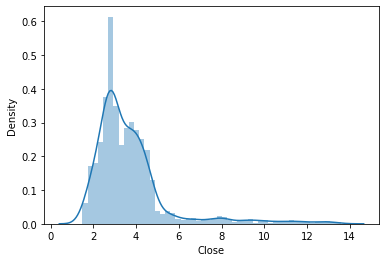

In [7]:
sns.distplot(data["Close"])

C:\Users\MACB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

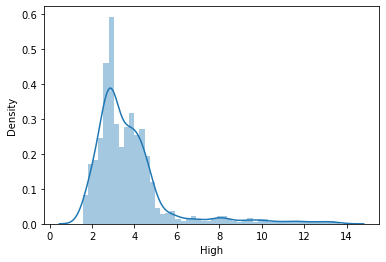

In [8]:
sns.distplot(data['High'])

In [9]:
X = data.drop('Close', axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 5)
(657, 5)
(2625,)
(657,)


In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [11]:
pred1

array([ 2.81200004,  5.8210001 ,  2.66199994,  5.98999977,  2.08299994,
       12.86100006,  3.98799992,  4.82200003,  1.78199995,  4.79500008,
        2.83999991,  3.55999994,  2.73699999,  2.96099997,  4.22700024,
        2.46300006,  4.12099981,  4.55999994,  8.96500015,  2.93899989,
        4.35500002,  2.67499995,  2.53500009,  2.33699989,  2.85299993,
        1.94400001,  2.75900006,  3.93799996,  3.30599999,  4.70499992,
        3.99099994,  2.69799995, 11.59799957,  4.24399996,  4.33699989,
        3.70700002,  3.49900007,  5.41599989,  3.65700006,  3.43600011,
        3.98399997,  2.43000007,  2.66700006,  2.57999992,  3.14199996,
        4.41300011,  4.2670002 ,  2.73399997,  3.90899992,  2.03900003,
        4.08300018,  2.47199988,  2.26900005,  3.94099998,  1.92700005,
        3.23000002,  3.72300005,  4.87300014,  4.36399984,  3.40300012,
        2.70000005,  3.88100004,  4.6789999 ,  3.13800001,  2.47000003,
        2.55200005,  4.35699987,  3.898     ,  2.46700001,  2.83

In [12]:
# MSE ---> Mean Squared Error
# RMSE ---> sqrt(MSE)
# r2_square ---> 1.0 == good value

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    
    ''' 
    y_test:- ground truth
    y_pred:- model_predict
    '''
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)
    
    print('MSE:- ', mse)
    print('RMSE:- ', rmse)
    print('R2_score:- ', r2_scors)
    
calculate_metrics(y_test, pred1)

MSE:-  1.4656063050767086e-30
RMSE:-  1.2106222801009027e-15
R2_score:-  1.0


In [13]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [14]:
calculate_metrics(y_test, la_p)

MSE:-  0.2369233626053282
RMSE:-  0.4867477402159441
R2_score:-  0.9132831519010188


In [15]:
calculate_metrics(y_test, ri_p)

MSE:-  2.8965487622267974e-05
RMSE:-  0.005381959459366818
R2_score:-  0.9999893982773053


In [16]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.001, 0.0001],
             'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.9s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.9s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.8s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   1.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.9s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.065 total time=   0.8s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [17]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [18]:
calculate_metrics(y_test, svr_pred)

MSE:-  2.698929409272651
RMSE:-  1.6428418698318628
R2_score:-  0.012158830433103285


In [23]:
import joblib

joblib.dump(ri, 'model.pkl')

ridge_from_joblib = model = joblib.load('model.pkl')